Image dtype: float32, shape: (768, 768)
[[1.05162406e-04 1.07209715e-04 1.10684967e-04 ... 3.10213334e-04
  3.20334104e-04 3.29399365e-04]
 [1.06542211e-04 1.10524088e-04 1.14160845e-04 ... 3.00299929e-04
  3.10030387e-04 3.18988838e-04]
 [1.09565270e-04 1.15787814e-04 1.20595876e-04 ... 2.91371281e-04
  2.98233936e-04 3.04324989e-04]
 ...
 [1.04883620e-04 9.63183920e-05 9.03650944e-05 ... 7.69518228e-05
  6.47116467e-05 4.92804575e-05]
 [1.13082402e-04 1.05608276e-04 9.82543424e-05 ... 6.82621467e-05
  5.64422116e-05 4.20885663e-05]
 [1.20440665e-04 1.17526266e-04 1.11869675e-04 ... 5.94196281e-05
  4.87147372e-05 3.54340955e-05]]
Mask dtype: float32, shape: (768, 768)
[[1.05162406e-04 1.07209715e-04 1.10684967e-04 ... 3.10213334e-04
  3.20334104e-04 3.29399365e-04]
 [1.06542211e-04 1.10524088e-04 1.14160845e-04 ... 3.00299929e-04
  3.10030387e-04 3.18988838e-04]
 [1.09565270e-04 1.15787814e-04 1.20595876e-04 ... 2.91371281e-04
  2.98233936e-04 3.04324989e-04]
 ...
 [1.04883620e-04 9.

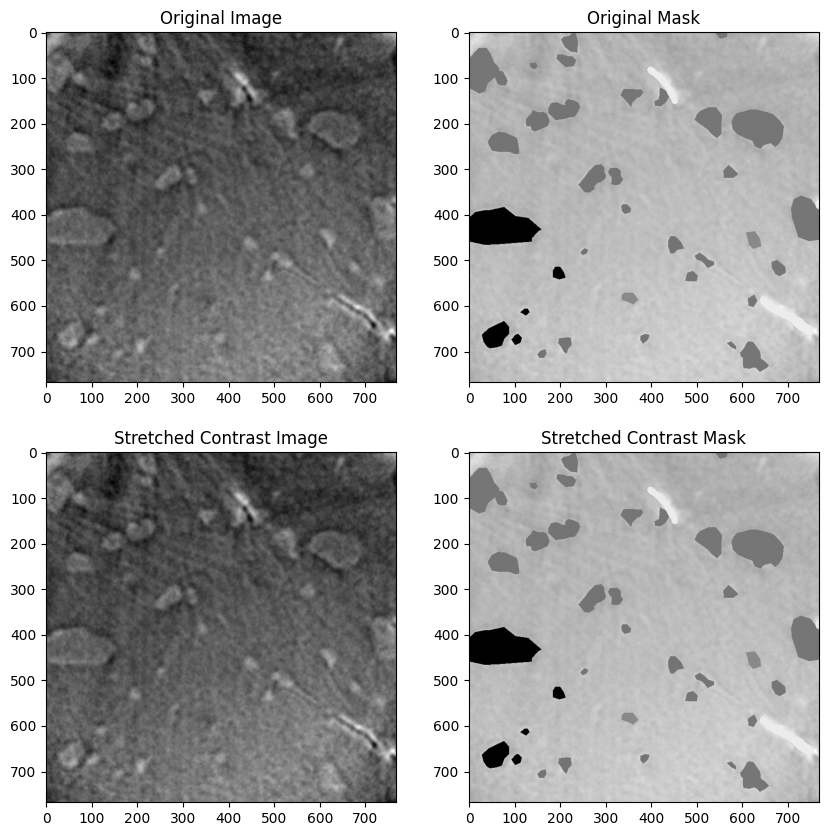

In [29]:


import tifffile as tiff

import numpy as np

import matplotlib.pyplot as plt

# Get filename

org_file = "../archive/Original Images/image_v2_00.tif"
mask_file = "../archive/Original Masks/image_v2_mask_00.tif"

# Load images

img = tiff.imread(org_file)
mask = tiff.imread(mask_file)

# If it's a 3D stack, take the middle slice

if img.ndim == 3:

    print(f"3D stack detected with shape: {img.shape}")

    img = img[img.shape[0] // 2]

# Print typings
print(f"Image dtype: {img.dtype}, shape: {img.shape}")
print(img)
print(f"Mask dtype: {mask.dtype}, shape: {mask.shape}")
print(mask)

# Stretch contrast manually

img_stretched = (img - np.min(img)) / (np.max(img) - np.min(img)) * 255
img_stretched = img_stretched.astype(np.uint8)
mask_stretched = (mask - np.min(mask)) / (np.max(mask) - np.min(mask)) * 255
mask_stretched = mask_stretched.astype(np.uint8)

# Show image and masked image with subplots with and wihtout stretched contrast
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].imshow(img, cmap='gray')
axs[0, 0].set_title('Original Image')
axs[0, 1].imshow(mask, cmap='gray')
axs[0, 1].set_title('Original Mask')
axs[1, 0].imshow(img_stretched, cmap='gray')
axs[1, 0].set_title('Stretched Contrast Image')
axs[1, 1].imshow(mask_stretched, cmap='gray')
axs[1, 1].set_title('Stretched Contrast Mask')
plt.show()


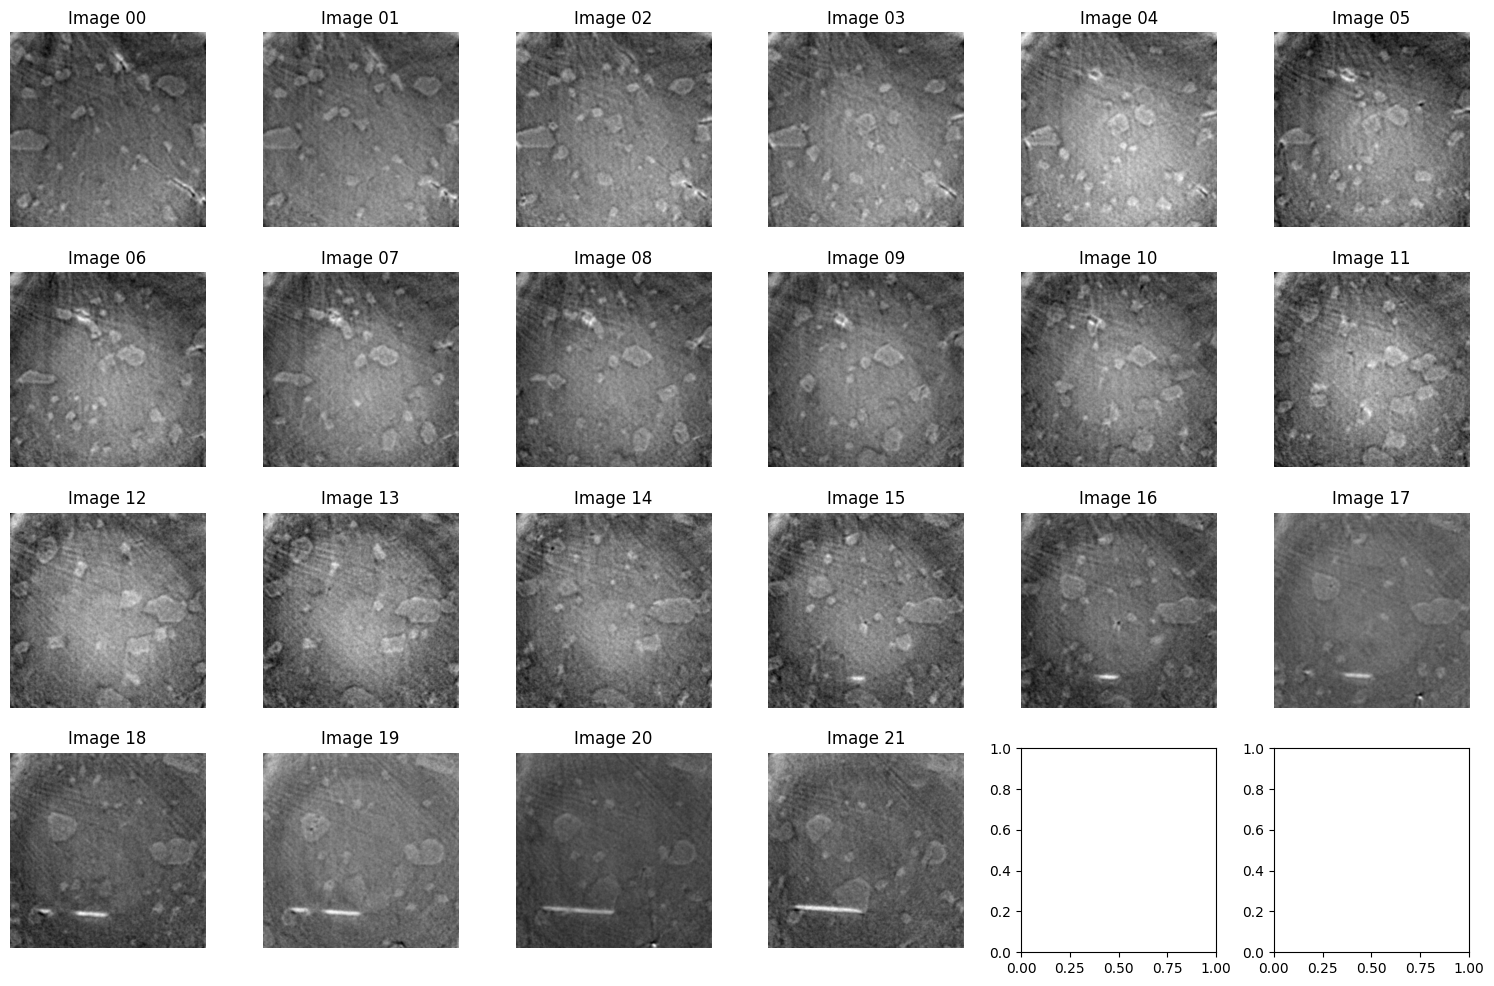

In [30]:
import tifffile as tiff

import numpy as np

import matplotlib.pyplot as plt

# Get filename

path = "../archive/Original Images/image_v2_"

# Load all 22 images
images = []
for i in range(22):
    filename = f"{path}{i:02d}.tif"
    img = tiff.imread(filename)
    images.append(img)

# Show all 22 images in a grid
fig, axs = plt.subplots(4, 6, figsize=(15, 10))
for i, img in enumerate(images):
    ax = axs[i // 6, i % 6]
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Image {i:02d}")
    ax.axis('off')
plt.tight_layout()
plt.show()